Path to my Datasets

Glossary Document (use_glossary.pdf): C:\Code\energy-demand-forecasting\docs\use_glossary.pdf


Thermal Conversion Factors (use_b_thermal_conversion_factors.pdf): C:\Code\energy-demand-forecasting\docs\use_b_thermal_conversion_factors.pdf


MSN Codes Document (use_a_msn_codes.pdf): C:\Code\energy-demand-forecasting\docs\use_a_msn_codes.pdf


MSN Codes and Descriptions Spreadsheet (msn_codes_and_descriptions.xlsx): C:\Code\energy-demand-forecasting\docs\msn_codes_and_descriptions.xlsx


BTU Data CSV (use_all_btu.csv): C:\Code\energy-demand-forecasting\data\raw\use_all_btu.csv


nuclear_related_msn_codes.csv: C:\Code\energy-demand-forecasting\docs\nuclear_related_msn_codes.csv

## Understand the Project Goal


The project aims to forecast energy demand using the available data.

- Analyzing historical data.
- Understanding patterns in energy usage.
- Predicting future demand.

In [462]:
import pandas as pd

file_path = r"C:\Code\energy-demand-forecasting\data\raw\use_all_btu.csv"
data = pd.read_csv(file_path)

data.head()

,Data_Status,State,MSN,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,2022F,AK,ABICB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,-2.0,-3.0,-3.0,-2.0,-14.0,-10.0,-7.0,-8.0,-6.0
1,2022F,AK,ARICB,312.0,555.0,489.0,589.0,791.0,878.0,1646.0,...,12763.0,12335.0,12450.0,12365.0,13561.0,4804.0,11973.0,12391.0,13425.0,12981.0
2,2022F,AK,ARTCB,312.0,555.0,489.0,589.0,791.0,878.0,1646.0,...,12763.0,12335.0,12450.0,12365.0,13561.0,4804.0,11973.0,12391.0,13425.0,12981.0
3,2022F,AK,ARTXB,312.0,555.0,489.0,589.0,791.0,878.0,1646.0,...,12763.0,12335.0,12450.0,12365.0,13561.0,4804.0,11973.0,12391.0,13425.0,12981.0
4,2022F,AK,AVACB,5209.0,6441.0,5202.0,3273.0,2319.0,1478.0,1086.0,...,701.0,658.0,1308.0,1240.0,1239.0,1264.0,1245.0,915.0,1037.0,1073.0


- There are 66 columns, with years ranging from 1960 to 2022, alongside metadata columns (Data_Status, State, MSN).
- It seems the rows represent energy consumption/activity by state and MSN (energy activity codes).

In [463]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14773 entries, 0 to 14772
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data_Status  14773 non-null  object 
 1   State        14773 non-null  object 
 2   MSN          14773 non-null  object 
 3   1960         10509 non-null  float64
 4   1961         10509 non-null  float64
 5   1962         10509 non-null  float64
 6   1963         10509 non-null  float64
 7   1964         10509 non-null  float64
 8   1965         10509 non-null  float64
 9   1966         10509 non-null  float64
 10  1967         10509 non-null  float64
 11  1968         10509 non-null  float64
 12  1969         10509 non-null  float64
 13  1970         10509 non-null  float64
 14  1971         10509 non-null  float64
 15  1972         10509 non-null  float64
 16  1973         10509 non-null  float64
 17  1974         10509 non-null  float64
 18  1975         10509 non-null  float64
 19  1976

In [464]:
data.isnull().sum()

Data_Status       0
State             0
MSN               0
1960           4264
1961           4264
               ... 
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 66, dtype: int64

- Years from 1960–2012 have 4264 missing values per column. Likely, not all states or MSNs have complete data for these years.
- Data for later years (2013–2022) seems more complete.

In [465]:
data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,1.050900e+04,...,1.362900e+04,1.362900e+04,1.435700e+04,1.461700e+04,1.461700e+04,1.477300e+04,1.477300e+04,1.477300e+04,1.477300e+04,1.477300e+04
mean,1.058757e+05,1.074607e+05,1.122155e+05,1.167279e+05,1.215757e+05,1.265530e+05,1.336302e+05,1.379216e+05,1.465682e+05,1.537703e+05,...,1.811094e+05,1.831260e+05,1.736792e+05,1.706514e+05,1.707682e+05,1.749346e+05,1.740214e+05,1.599728e+05,1.690739e+05,1.715564e+05
std,1.036975e+06,1.051741e+06,1.097894e+06,1.141103e+06,1.188766e+06,1.237065e+06,1.305810e+06,1.347238e+06,1.428495e+06,1.497388e+06,...,1.871659e+06,1.892736e+06,1.837124e+06,1.818672e+06,1.818246e+06,1.876875e+06,1.867503e+06,1.712777e+06,1.808747e+06,1.836826e+06
min,-1.360010e+05,-1.402480e+05,-1.441310e+05,-1.475590e+05,-1.547940e+05,-1.657200e+05,-1.678720e+05,-1.389200e+05,-1.694940e+05,-1.933400e+05,...,-6.773260e+05,-6.130800e+05,-5.513670e+05,-5.559180e+05,-5.582120e+05,-5.103780e+05,-6.559450e+05,-7.005300e+05,-7.566390e+05,-7.189920e+05
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+00,2.000000e+00,1.700000e+00,1.250000e+00,2.500000e+00,2.480000e+00
50%,1.562000e+03,1.507000e+03,1.614000e+03,1.639000e+03,1.807000e+03,1.894000e+03,1.955000e+03,1.977000e+03,2.008000e+03,2.062000e+03,...,1.146000e+03,1.216000e+03,8.340000e+02,7.830000e+02,8.070000e+02,7.790000e+02,7.790000e+02,7.730000e+02,8.560000e+02,8.830000e+02
75%,2.383800e+04,2.424200e+04,2.513000e+04,2.624700e+04,2.710400e+04,2.816400e+04,2.950600e+04,3.050700e+04,3.290500e+04,3.469800e+04,...,3.022900e+04,3.073100e+04,2.623500e+04,2.452000e+04,2.465000e+04,2.445400e+04,2.472100e+04,2.286600e+04,2.424600e+04,2.463500e+04
max,4.393528e+07,4.455770e+07,4.654313e+07,4.840968e+07,5.049417e+07,5.257756e+07,5.557343e+07,5.733551e+07,6.082070e+07,6.379145e+07,...,9.423746e+07,9.532823e+07,9.447251e+07,9.408651e+07,9.390635e+07,9.740415e+07,9.657610e+07,8.887085e+07,9.334966e+07,9.477372e+07


Numeric Data:

- Data spans a wide range (negative values, zeros, and very high values like 9.7e+07).
- Negative values might represent corrections, estimates, or anomalies.

Statistical Summary:

- The mean, std, and max values highlight significant variability across states and MSNs.

In [466]:
# Reshape data to long format
data_long = data.melt(id_vars=["Data_Status", "State", "MSN"], 
                      var_name="Year", 
                      value_name="Energy_Value")

# Convert Year to integer
data_long['Year'] = data_long['Year'].astype(int)

data_long.head()

,Data_Status,State,MSN,Year,Energy_Value
0,2022F,AK,ABICB,1960,0.0
1,2022F,AK,ARICB,1960,312.0
2,2022F,AK,ARTCB,1960,312.0
3,2022F,AK,ARTXB,1960,312.0
4,2022F,AK,AVACB,1960,5209.0


In [467]:
# Check missing values
missing_perc = data_long['Energy_Value'].isnull().mean() * 100
print(f"Missing values percentage: {missing_perc}%")

# Drop rows with missing values
data_cleaned = data_long.dropna(subset=["Energy_Value"])

Missing values percentage: 22.253811382627468%


In [468]:
# 1. Drop Rows with Missing Values
#If the missing values are scattered and not concentrated in key areas, you can drop rows with missing values. 
# This reduces the dataset size but ensures all remaining data is complete:

# data_cleaned = data_long.dropna(subset=["Energy_Value"])
# print(f"Remaining data after dropping missing values: {len(data_cleaned)} rows")


In [469]:
#Fill Missing Values
# If you think missing values represent gaps in the timeline or data collection, you can fill them in. Some common strategies:

# Forward Fill: Use the last available value.
# Backward Fill: Use the next available value.
# Mean/Median Fill: Use the mean/median of the column.

# data_filled = data_long.copy()
# data_filled['Energy_Value'] = data_filled['Energy_Value'].fillna(method='ffill')


In [470]:
# Fill with Interpolation
# If your data is time series, you can interpolate missing values:

data_interpolated = data_long.copy()
data_interpolated['Energy_Value'] = data_interpolated['Energy_Value'].interpolate(method='linear')


In [471]:
# Check for remaining missing values
remaining_missing = data_interpolated['Energy_Value'].isnull().sum()
print(f"Remaining missing values: {remaining_missing}")

# Preview data where interpolation occurred
interpolated_rows = data_long[(data_long['Energy_Value'].isnull()) & (data_interpolated['Energy_Value'].notnull())]
print(interpolated_rows.head())


Remaining missing values: 0
   Data_Status State    MSN  Year  Energy_Value
14       2022F    AK  BMCAS  1960           NaN
16       2022F    AK  BQICB  1960           NaN
17       2022F    AK  BQTCB  1960           NaN
18       2022F    AK  BTCAS  1960           NaN
19       2022F    AK  BTGBP  1960           NaN


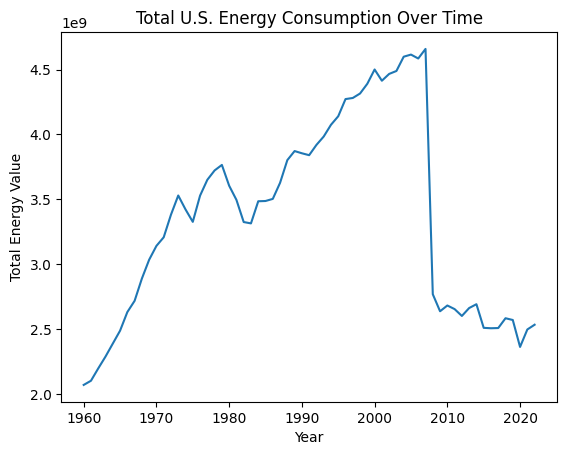

In [472]:
# Aggregate by year
total_energy = data_interpolated.groupby('Year')['Energy_Value'].sum().reset_index()

# Plot total energy trends
import matplotlib.pyplot as plt
plt.plot(total_energy['Year'], total_energy['Energy_Value'])
plt.title('Total U.S. Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.show()


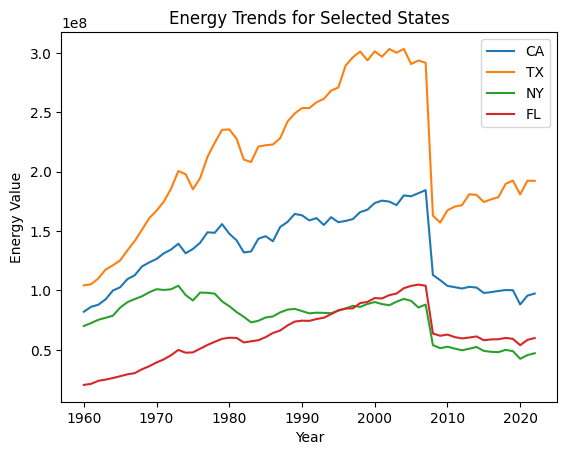

In [473]:
statewise_energy = data_interpolated.groupby(['State', 'Year'])['Energy_Value'].sum().reset_index()

# Plot trends for selected states
for state in ['CA', 'TX', 'NY', 'FL']:
    state_data = statewise_energy[statewise_energy['State'] == state]
    plt.plot(state_data['Year'], state_data['Energy_Value'], label=state)

plt.title('Energy Trends for Selected States')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.legend()
plt.show()


In [474]:
negative_values = data_interpolated[data_interpolated['Energy_Value'] < 0]
print(f"Negative values count: {len(negative_values)}")
print(negative_values.head())


Negative values count: 4137
    Data_Status State    MSN  Year  Energy_Value
334       2022F    AL  ELISB  1960      -46800.0
902       2022F    AZ  ELISB  1960       -2560.0
903       2022F    AZ  ELNIB  1960         -51.0
904       2022F    AZ  ELVHN  1960         -34.0
905       2022F    AZ  ELVHS  1960         -17.0


In [475]:
# Option: Replace negatives with NaN and interpolate again
data_interpolated['Energy_Value'] = data_interpolated['Energy_Value'].apply(lambda x: x if x >= 0 else None).interpolate(method='linear')


In [476]:
# Save interpolated data
processed_file_path = r"C:\Code\energy-demand-forecasting\data\processed\cleaned_energy_data.csv"
data_interpolated.to_csv(processed_file_path, index=False)
print(f"Cleaned data saved to {processed_file_path}")


Cleaned data saved to C:\Code\energy-demand-forecasting\data\processed\cleaned_energy_data.csv


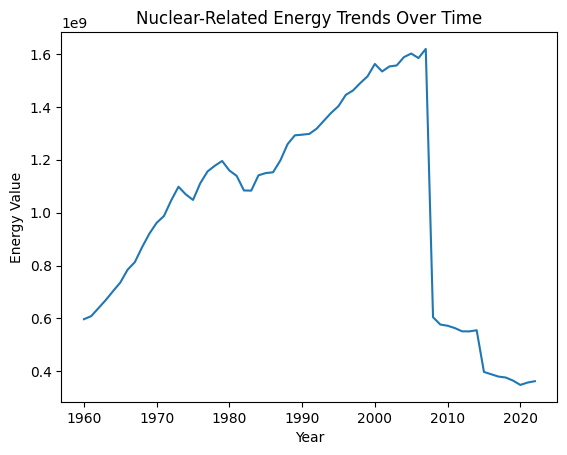

In [477]:
# Load nuclear MSN codes
nuclear_msn_path = r"C:\Code\energy-demand-forecasting\docs\nuclear_related_msn_codes.csv"
nuclear_msn = pd.read_csv(nuclear_msn_path)

# Filter data for nuclear-related MSNs
nuclear_data = data_interpolated[data_interpolated['MSN'].isin(nuclear_msn['MSN'])]

# Aggregate and plot nuclear-related trends
nuclear_trends = nuclear_data.groupby('Year')['Energy_Value'].sum().reset_index()
plt.plot(nuclear_trends['Year'], nuclear_trends['Energy_Value'])
plt.title('Nuclear-Related Energy Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.show()


In [478]:
import plotly.express as px

# Interactive plot for state-level trends
fig = px.line(statewise_energy, x="Year", y="Energy_Value", color="State",
              title="State-Level Energy Trends",
              labels={"Energy_Value": "Energy Consumption"})
fig.show()


C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



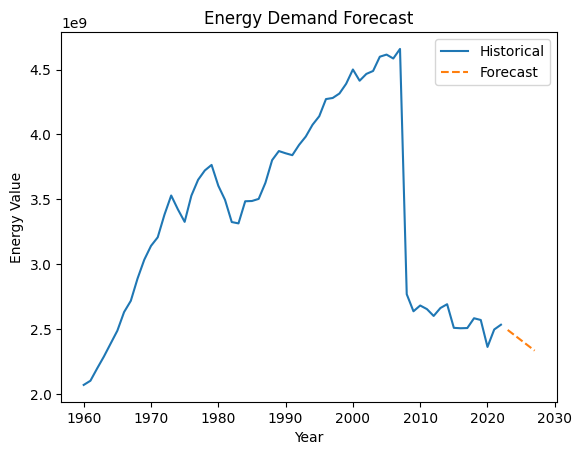

In [479]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Forecasting with Exponential Smoothing
model = ExponentialSmoothing(total_energy['Energy_Value'], trend='add', seasonal=None)
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

# Visualize the forecast
forecast_years = range(total_energy['Year'].iloc[-1] + 1, total_energy['Year'].iloc[-1] + 6)
plt.plot(total_energy['Year'], total_energy['Energy_Value'], label='Historical')
plt.plot(forecast_years, forecast, label='Forecast', linestyle='--')
plt.title('Energy Demand Forecast')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.legend()
plt.show()


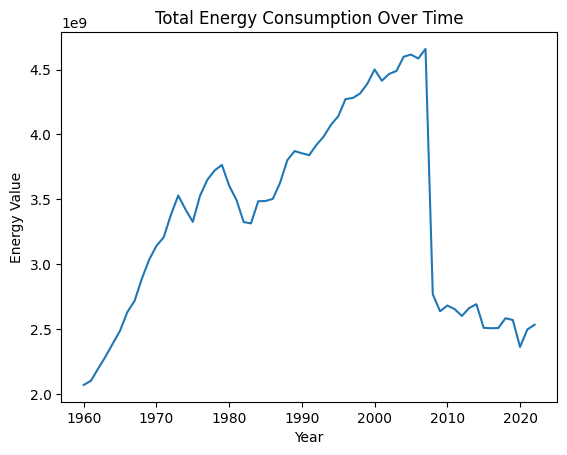

In [480]:
plt.plot(total_energy['Year'], total_energy['Energy_Value'])
plt.title('Total Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.show()


In [481]:
import numpy as np

In [482]:
# Log transform to stabilize variance (if values are non-negative)
total_energy['Energy_Value'] = total_energy['Energy_Value'].apply(lambda x: np.log1p(x))


In [483]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [484]:
model = ExponentialSmoothing(
    total_energy['Energy_Value'], 
    trend='add', 
    seasonal=None, 
    use_boxcox=False,  # Set use_boxcox here
    damped_trend=True  # Optional, if using a damped trend
)
model_fit = model.fit()


In [485]:
model_fit = model.fit(optimized=True, remove_bias=True)  # Do not re-specify use_boxcox



In [486]:
model = ExponentialSmoothing(total_energy['Energy_Value'], trend='add', seasonal=None)
model_fit = model.fit()



In [487]:
# Check for NaNs or infinite values
print(total_energy['Energy_Value'].isnull().sum())
print(total_energy['Energy_Value'].replace([np.inf, -np.inf], np.nan).isnull().sum())

# Drop or handle invalid rows if necessary
total_energy = total_energy.dropna()



0
0


In [488]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(total_energy['Energy_Value'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=5)
print(forecast)


63    21.654635
64    21.654740
65    21.654748
66    21.654748
67    21.654748
Name: predicted_mean, dtype: float64


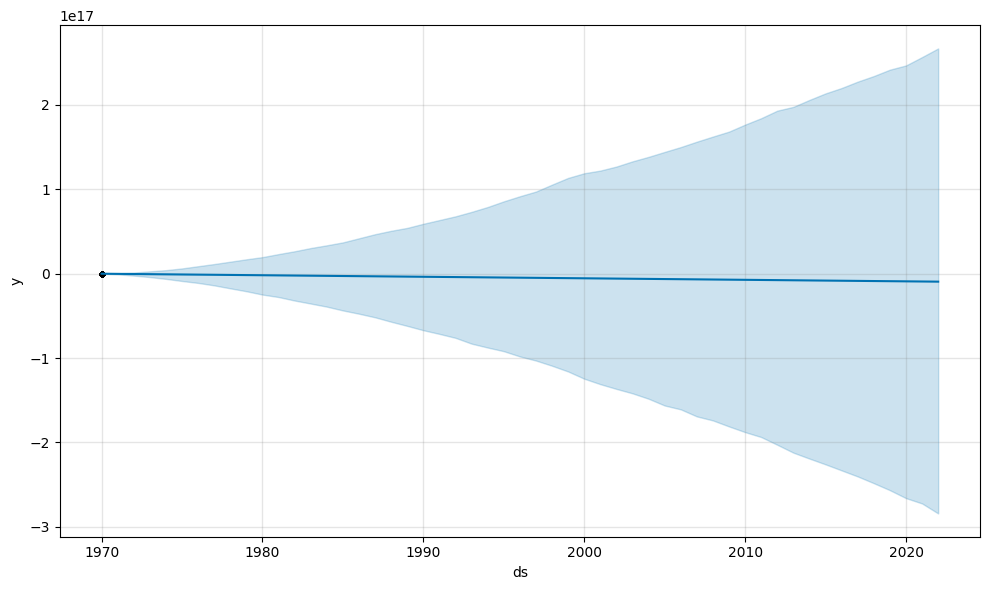

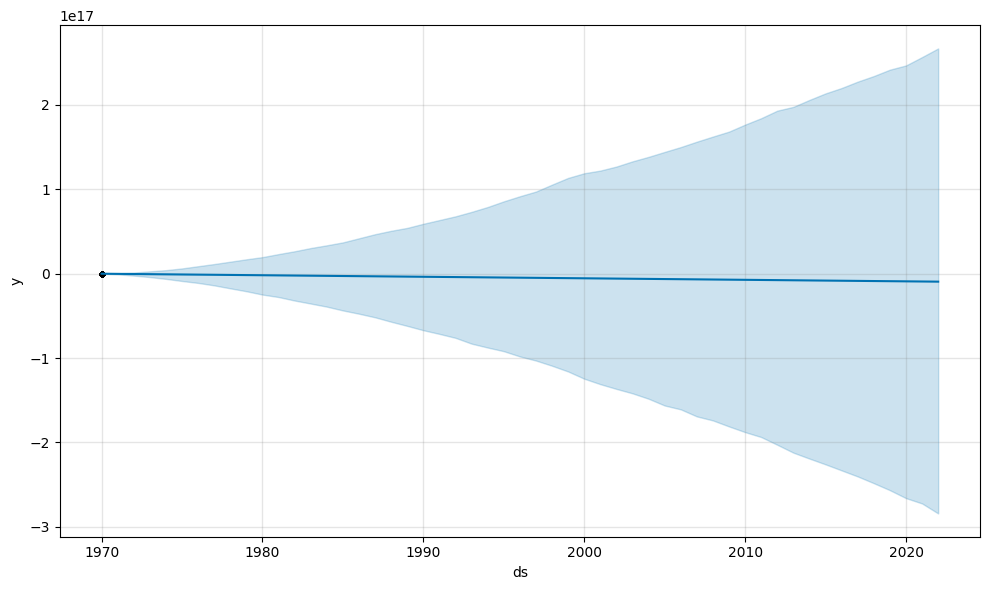

In [489]:
from prophet import Prophet
import logging
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)

# Prepare data for Prophet
prophet_data = total_energy.rename(columns={'Year': 'ds', 'Energy_Value': 'y'})

model = Prophet()
model.fit(prophet_data)

# Forecast
# Create a future dataframe with 'YE' frequency instead of 'Y'
future = model.make_future_dataframe(periods=52, freq='YE')

forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
